In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Harris.csv')
df

,user_country,source,content,date
0,"Plymouth, Ma",Twitter for iPad,"@KamalaHarris @JoeBiden Good Luck Joe, you wer...",2020-09-29T23:59:59+00:00
1,FL MI PR🇵🇷 MEX🇲🇽 USA🇺🇸,Twitter for Android,@JoeBiden @KamalaHarris YOU NEVER HELPED US BE...,2020-09-29T23:59:59+00:00
2,United States’ Midwest,Twitter for iPhone,@KamalaHarris @JoeBiden I hope he keeps Trolln...,2020-09-29T23:59:59+00:00
3,"Georgia, USA",Twitter for iPhone,@JoeBiden Go get em @JoeBiden Thank you for ...,2020-09-29T23:59:59+00:00
4,New York State,Twitter for Android,@KamalaHarris @JoeBiden You've got this Joe! ...,2020-09-29T23:59:58+00:00
...,...,...,...,...
1995,Albuquerque NM,Twitter Web App,@KamalaHarris @JoeBiden Good luck Joe. I will ...,2020-09-29T23:50:50+00:00
1996,"Minnesota, USA",Twitter for Android,@KamalaHarris @JoeBiden Good luck tonight Joe....,2020-09-29T23:50:50+00:00
1997,NaN,Twitter for Android,@KamalaHarris @JoeBiden Lol. Joe's bring every...,2020-09-29T23:50:49+00:00
1998,Earth 616,Twitter for Android,@JoeBiden @KamalaHarris If? When.,2020-09-29T23:50:49+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

43757
['@kamalaharris', '@joebiden', 'good', 'luck', 'joe', ',', 'you', 'were', 'made', 'for', 'this', '!', '❤', '️', '👊', '🏼', '@joebiden', '@kamalaharris', 'you', 'never']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 126.52%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

15212
['good', 'luck', 'joe', 'made', 'never', 'helped', 'makes', 'think', "we'll", 'believe', 'talk', 'action', 'corrupt', 'politician', 'hope', 'keeps', 'trollnald', 'ropes', 'takes', 'fucking']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@joebiden', 1702),
 ('@kamalaharris', 1624),
 ('@realdonaldtrump', 35),
 ('@therock', 33),
 ('@doxie53', 30),
 ('@drbiden', 29),
 ('@lanceusa70', 27),
 ('@sara2001noor', 27),
 ('@cosmicactorvist', 27),
 ('@zimraniaxy', 27),
 ('@cms36', 27),
 ('@radio_martin', 27),
 ('@wifeyspice90', 27),
 ('@persiflage77', 27),
 ('@tenda38', 26),
 ('@indieagitator', 26),
 ('@douglasemhoff', 25),
 ('@yamiche', 23),
 ('@plumptytrumpty', 22),
 ('@drodvik52', 22)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,"Plymouth, Ma",Twitter for iPad,"@KamalaHarris @JoeBiden Good Luck Joe, you wer...",2020-09-29T23:59:59+00:00,Positive
1,FL MI PR🇵🇷 MEX🇲🇽 USA🇺🇸,Twitter for Android,@JoeBiden @KamalaHarris YOU NEVER HELPED US BE...,2020-09-29T23:59:59+00:00,Negative
2,United States’ Midwest,Twitter for iPhone,@KamalaHarris @JoeBiden I hope he keeps Trolln...,2020-09-29T23:59:59+00:00,Positive
3,"Georgia, USA",Twitter for iPhone,@JoeBiden Go get em @JoeBiden Thank you for ...,2020-09-29T23:59:59+00:00,Neutral
4,New York State,Twitter for Android,@KamalaHarris @JoeBiden You've got this Joe! ...,2020-09-29T23:59:58+00:00,Neutral
...,...,...,...,...,...
1995,Albuquerque NM,Twitter Web App,@KamalaHarris @JoeBiden Good luck Joe. I will ...,2020-09-29T23:50:50+00:00,Positive
1996,"Minnesota, USA",Twitter for Android,@KamalaHarris @JoeBiden Good luck tonight Joe....,2020-09-29T23:50:50+00:00,Negative
1997,NaN,Twitter for Android,@KamalaHarris @JoeBiden Lol. Joe's bring every...,2020-09-29T23:50:49+00:00,Positive
1998,Earth 616,Twitter for Android,@JoeBiden @KamalaHarris If? When.,2020-09-29T23:50:49+00:00,Neutral


In [11]:
df.sentiment.value_counts()

Positive    931
Neutral     764
Negative    305
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 46.55%
Percentage of neutral tweets: 38.20%
Percentage of negative tweets: 15.25%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

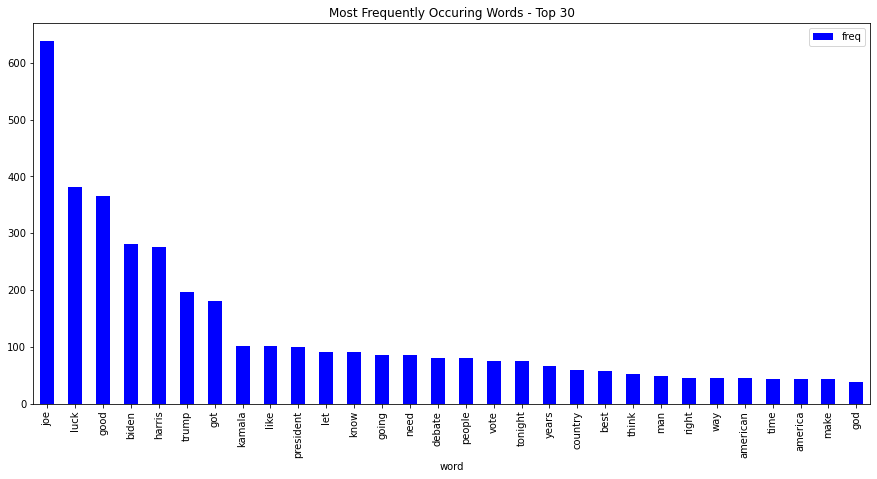

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

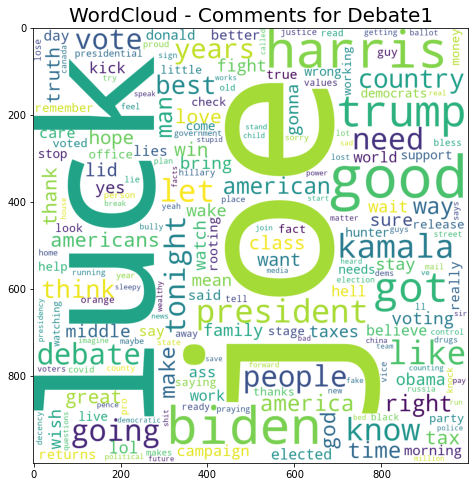

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

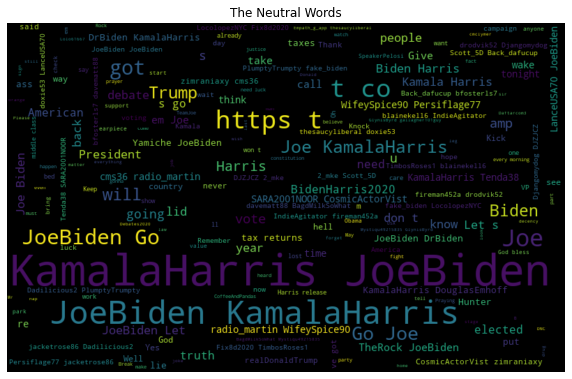

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

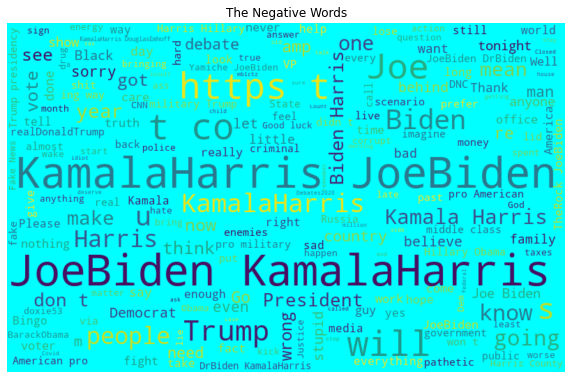

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

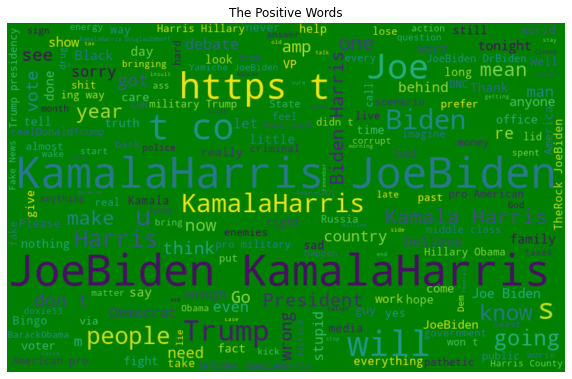

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,"@KamalaHarris @JoeBiden Good Luck Joe, you wer...",Positive
1,@JoeBiden @KamalaHarris YOU NEVER HELPED US BE...,Negative
2,@KamalaHarris @JoeBiden I hope he keeps Trolln...,Positive
3,@JoeBiden Go get em @JoeBiden Thank you for ...,Neutral
4,@KamalaHarris @JoeBiden You've got this Joe! ...,Neutral
...,...,...
1995,@KamalaHarris @JoeBiden Good luck Joe. I will ...,Positive
1996,@KamalaHarris @JoeBiden Good luck tonight Joe....,Negative
1997,@KamalaHarris @JoeBiden Lol. Joe's bring every...,Positive
1998,@JoeBiden @KamalaHarris If? When.,Neutral


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,good luck joe you were made for this
1,Negative,you never helped us before what makes you thin...
2,Positive,i hope he keeps trollnald against the ropes an...
3,Neutral,go get em thank you for all you and are doing ...
4,Neutral,you ve got this joe fight for all of us
...,...,...
1995,Positive,good luck joe i will be rooting for you don t ...
1996,Negative,good luck tonight joe this nasty woman is root...
1997,Positive,lol joe s bring everything he s got thats not ...
1998,Neutral,if when


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,good luck joe you were made for this
2,Positive,i hope he keeps trollnald against the ropes an...
5,Positive,don t let him rattle you or dominate your time...
6,Positive,good luck joe
7,Positive,good luck you ll do great the fate of the free...
...,...,...
1940,Negative,be yourself joe don t let that moron try to si...
1953,Negative,so bidens average a tax rate and harris about ...
1961,Negative,just hope he doesn t fall over dead
1971,Negative,nobody who has been in office as long as biden...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,good luck joe you were made for this
2,1,i hope he keeps trollnald against the ropes an...
5,1,don t let him rattle you or dominate your time...
6,1,good luck joe
7,1,good luck you ll do great the fate of the free...
...,...,...
1940,0,be yourself joe don t let that moron try to si...
1953,0,so bidens average a tax rate and harris about ...
1961,0,just hope he doesn t fall over dead
1971,0,nobody who has been in office as long as biden...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(927, 2)
(309, 2)


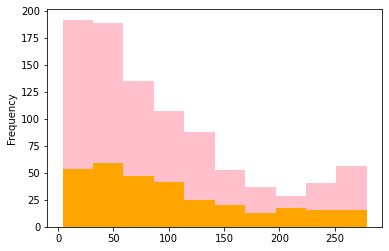

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(211909, 345640)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('team', 0.8470245599746704),
 ('between', 0.8395410776138306),
 ('windivisible', 0.8366298079490662),
 ('showdown', 0.8361945748329163),
 ('cause', 0.8284428119659424),
 ('presidentialdebate', 0.8240727186203003),
 ('pedophile', 0.822869062423706),
 ('checking', 0.8179856538772583),
 ('joebiden', 0.8151782751083374),
 ('versus', 0.8147112131118774)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('american', -0.29782772064208984),
 ('prefer', -0.3297569751739502),
 ('presidency', -0.3340727388858795),
 ('pro', -0.33419787883758545),
 ('americans', -0.34993842244148254),
 ('our', -0.3521307706832886),
 ('enemies', -0.3599061369895935),
 ('hillary', -0.3637656569480896),
 ('military', -0.3678567409515381),
 ('now', -0.3729180097579956)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(927, 500)
(927,)
(309, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989212513484358
Validation Accuracy : 0.4692556634304207
F1 score : 0.5706806282722513
[[ 36  36]
 [128 109]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9956850053937433
Validation Accuracy : 0.7087378640776699
f1 score : 0.8132780082987553
[[ 23  49]
 [ 41 196]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989212513484358
Validation Accuracy : 0.4627831715210356
f1 score : 0.5388888888888889
[[ 46  26]
 [140  97]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9439050701186623
Validation Accuracy : 0.7766990291262136
f1 score : 0.8729281767955802
[[  3  69]
 [  0 237]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 bring the facts and don t get down in the mud with that slimeball you got this gojoe 

First sample after preprocessing: 
 [150   2   4  39  13  50  87  14   2  28  21   1  33  17   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6298 - accuracy: 0.7206 - val_loss: 0.5766 - val_accuracy: 0.7527
Epoch 2/20
7/7 - 1s - loss: 0.5716 - accuracy: 0.7482 - val_loss: 0.5568 - val_accuracy: 0.7527
Epoch 3/20
7/7 - 1s - loss: 0.5648 - accuracy: 0.7482 - val_loss: 0.5637 - val_accuracy: 0.7527
Epoch 4/20
7/7 - 1s - loss: 0.5499 - accuracy: 0.7482 - val_loss: 0.5469 - val_accuracy: 0.7527
Epoch 5/20
7/7 - 1s - loss: 0.5318 - accuracy: 0.7482 - val_loss: 0.5151 - val_accuracy: 0.7527
Epoch 6/20
7/7 - 1s - loss: 0.5020 - accuracy: 0.7482 - val_loss: 0.4803 - val_accuracy: 0.7527
Epoch 7/20
7/7 - 1s - loss: 0.4605 - accuracy: 0.7482 - val_loss: 0.4526 - val_accuracy: 0.7527
Epoch 8/20
7/7 - 1s - loss: 0.4159 - accuracy: 0.7482 - val_loss: 0.4280 - val_accuracy: 0.7527
Epoch 9/20
7/7 - 1s - loss: 0.3727 - accuracy: 0.7530 - val_loss: 0.4058 - val_accuracy: 0.7742
Epoch 10/20
7/7 - 1s - loss: 0.3360 - accuracy: 0.8249 - val_loss: 0.3941 - val_accuracy: 0.8065
Epoch 11/20
7/7 - 1s - loss: 0.2991 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,good luck joe you were made for this
1,0,you never helped us before what makes you thin...
2,1,i hope he keeps trollnald against the ropes an...
3,-1,go get em thank you for all you and are doing ...
4,-1,you ve got this joe fight for all of us
...,...,...
1995,1,good luck joe i will be rooting for you don t ...
1996,0,good luck tonight joe this nasty woman is root...
1997,1,lol joe s bring everything he s got thats not ...
1998,-1,if when


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.998
Validation Accuracy : 0.414
F1 score : [0.49901768 0.09174312 0.39267016]
[[127   7  44]
 [ 54   5  24]
 [150  14  75]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9386666666666666
Validation Accuracy : 0.418
f1 score : [0.501002   0.08       0.39900249]
[[125   3  50]
 [ 47   4  32]
 [149  10  80]]


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.998
Validation Accuracy : 0.344
f1 score : [0.41474654 0.25252525 0.30978261]
[[ 90  34  54]
 [ 40  25  18]
 [126  56  57]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9066666666666666
Validation Accuracy : 0.482
f1 score : [0.53961456 0.         0.51111111]
[[126   0  52]
 [ 39   0  44]
 [124   0 115]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['good luck joe', 'haven t you heard biden has already lost the debate', 'joe who', 'good luck', 'wrong voters did vote trump is still president and the senate is controlled by republicans you need to get over it', 'break a leg not a hip', 'what time will the lid be when you re elected', 'presidentialdebate debates presidentialdebate trump joebiden live us presidential debate joe biden vs donald trump', 'be yourself joe don t let that moron try to sidetrack you lay out your plan', 'ditto from this canadian girl as well go joe', 'i ll be saying no to a dictatorship i m voting biden harris', 'oh man are you gonna be disappointed', 'not you', 'what all can you get done by before your daily lid', 'dude you ve had years to do just that and you have done k', 'you can t win with his crowd so just have fun', 'mi goblue martin over greed i ve only seen that once and thought it was funny af thank you patrice g app wearamask', 'integrity character experience h

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.4760 - accuracy: 0.1570 - val_loss: 0.2838 - val_accuracy: 0.1267
Epoch 2/20
11/11 - 2s - loss: 0.2601 - accuracy: 0.1504 - val_loss: 0.2280 - val_accuracy: 0.1267
Epoch 3/20
11/11 - 3s - loss: 0.2678 - accuracy: 0.1504 - val_loss: 0.2328 - val_accuracy: 0.1267
Epoch 4/20
11/11 - 3s - loss: 0.2289 - accuracy: 0.1504 - val_loss: 0.2093 - val_accuracy: 0.1267
Epoch 5/20
11/11 - 2s - loss: 0.1550 - accuracy: 0.1504 - val_loss: 0.0562 - val_accuracy: 0.1267
Epoch 6/20
11/11 - 2s - loss: -1.6290e-01 - accuracy: 0.1504 - val_loss: -3.7598e-01 - val_accuracy: 0.1267
Epoch 7/20
11/11 - 2s - loss: -9.5673e-01 - accuracy: 0.2052 - val_loss: -1.4320e+00 - val_accuracy: 0.2333
Epoch 8/20
11/11 - 2s - loss: -3.1651e+00 - accuracy: 0.2815 - val_loss: -4.1042e+00 - val_accuracy: 0.2000
Epoch 9/20
11/11 - 2s - loss: -8.0397e+00 - accuracy: 0.2563 - val_loss: -9.6474e+00 - val_accuracy: 0.2333
Epoch 10/20
11/11 - 2s - loss: -1.8777e+01 - accuracy: 0.2756 - val_loss: -2.0